## Total variation denoising
Denoising using $L_1$-norm is often used. The model is simple. We have an image $x$ and it is corrupted by noise:
$$
  y = x + \eta.
$$
We want to do noise removal.The number of unknowns is larger then the number of equations, thus we have to impose a structure on the solution. And it is a piecewise-smooth structure, which implies that the gradient $\nabla x$ is sparse!  
The **total variation** is a good measure:
$$
   TV(x) = \Vert \nabla x\Vert_1
$$
and the minimization problem is
$$
  \arg \min\Vert x - y \Vert^2_2 + TV(y) 
$$
is minimized. We use ``scikits.image`` module, which can be installed in Anaconda just as 
```
conda install scikits-image
```
The example is adapted from [here](http://scikit-image.org/docs/dev/auto_examples/plot_denoise.html)

In [1]:
%matplotlib inline
import numpy as np
import scipy 
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

Load the data and add noise, plot the noisy data.

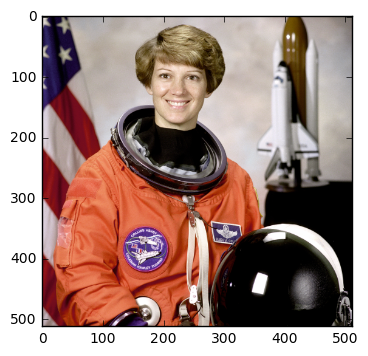

In [2]:
lena = data.astronaut()
plt.imshow(lena)

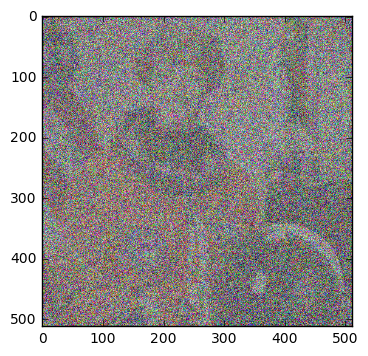

In [15]:
lena_cl = lena
#lena_cl = lena[100:300, 100:320, 1]

noisy = lena_cl.copy() + 20.0* lena.std() * np.random.random(lena_cl.shape)
noisy -= np.min(noisy)
noisy /= np.max(noisy)
#noisy = np.clip(noisy, 0, 1)
plt.gray()
plt.imshow(noisy)

And apply magic to recover!

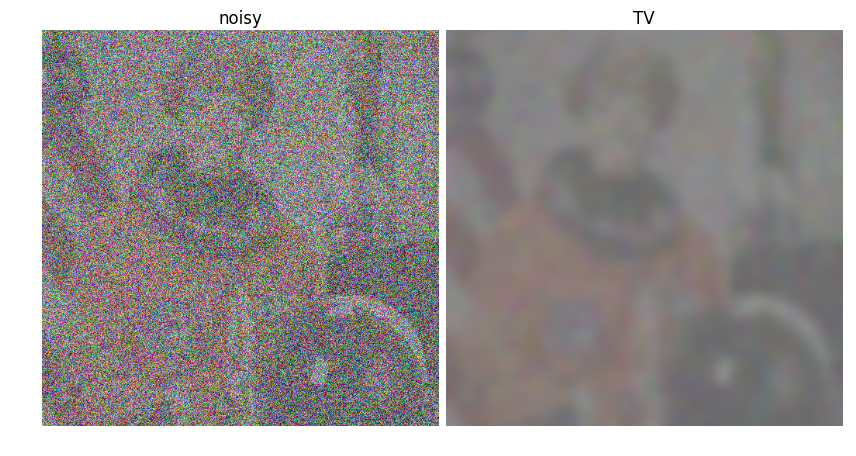

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('noisy')
ax[1].imshow(denoise_tv_chambolle(noisy, weight=100, multichannel=True))
ax[1].axis('off')
ax[1].set_title('TV')
fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

We can also plot "the gradient", also called **Sobel filter**

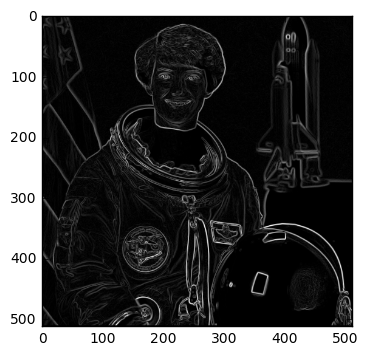

In [17]:
from skimage import filters
img_edges = filters.sobel(lena[:, :, 2])
plt.imshow(img_edges) 

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Questions
- What is going on? (we minimize   $\arg \min\Vert x - y \Vert^2_2 + TV(y)$)
- Why $L_1$ norm and not $L_2$ norm?
- How it is actually minimized?
- Why $L_1$ norm promotes **sparsity**?
